In [45]:
import numpy as np
import pandas as pd

In [46]:
df = pd.read_csv("C:/Users/arist/Desktop/Quantum/My Books/IITM/Internship Prep/Machine Learning Algo/housing_dataset.csv", usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
hdataset = df.dropna()
dataset = hdataset.to_numpy()
total_rows = dataset.shape[0]
train_size = int(total_rows * 0.7)

x_train = dataset[:train_size, :-1]
y_train = dataset[:train_size, -1]
# validation_rows = int(train_size * 0.2)
x_test = dataset[train_size:, :-1]
y_test = dataset[train_size:, -1]

# print("pagal",np.isnan(dataset).sum())

By Normal Equation

In [48]:
A_mat = np.insert(arr = x_train, values = np.ones(train_size), axis = 1, obj = 8)

# print(A_mat.shape)
# print(A_mat[0])

In [49]:
c_mat = np.linalg.solve(np.transpose(A_mat) @ A_mat, np.transpose(A_mat) @ y_train)
print(c_mat)

[-3.68059401e+04 -4.07995447e+04  8.05477637e+02 -7.53312401e+00
  8.64044724e+01 -4.43620092e+01  8.43345441e+01  4.01694479e+04
 -2.92714360e+06]


In [50]:
A_mat_test = np.insert(arr = x_test, values = np.ones(total_rows - train_size), axis = 1, obj = 8)
y_pred = A_mat_test @ c_mat

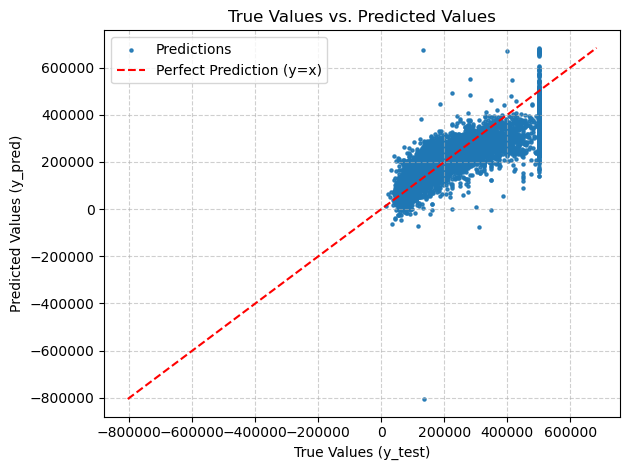

In [51]:
# plots
import matplotlib.pyplot as plt

y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

plt.scatter(y_test_flat, y_pred_flat, alpha=0.9, s=5, label='Predictions')

min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True Values vs. Predicted Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout() 
plt.show()

In [52]:
mse = np.mean((y_pred_flat - y_test_flat)**2)
print(mse)

5746700024.75762


Gradient Decent

In [ ]:
import numpy as np
import pandas as pd

# 1. Load data
df = pd.read_csv("C:/Users/arist/Desktop/Quantum/My Books/IITM/Internship Prep/Machine Learning Algo/housing_dataset.csv", usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8])
dataset = df.dropna().to_numpy()
total_rows = dataset.shape[0]
train_size = int(total_rows * 0.7)

x_train = dataset[:train_size, :-1]
y_train = dataset[:train_size, -1]
x_test = dataset[train_size:, :-1]
y_test = dataset[train_size:, -1]

# 2. Standardize features (important for gradient descent stability)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train_scaled = (x_train - mean) / std
x_test_scaled = (x_test - mean) / std

# 3. Add bias column (at position 0)
A_mat = np.insert(x_train_scaled, 0, 1, axis=1)
A_mat_test = np.insert(x_test_scaled, 0, 1, axis=1)

w = np.ones(A_mat.shape[1])

def grad_w(A, w, y):
    grad_loss = A @ w - y
    return A.T @ grad_loss

def do_gradient_descent():
    global w
    eta, epochs = 0.001, 1000000 
    for i in range(epochs):
        dw = grad_w(A_mat, w, y_train)
        w = w - eta * dw / len(y_train)  # scale by number of samples (averaged gradient)
        if i % 10000 == 0:
            # Optionally monitor loss
            loss = np.mean((A_mat @ w - y_train) ** 2)
            print(f"Epoch {i}, Loss: {loss}")
    print("Final Weights (w):", w)
    return w

c_mat = do_gradient_descent()
y_pred = A_mat_test @ c_mat



Epoch 0, Loss: 51958986937.55612
Epoch 1000, Loss: 11916333368.650171
Epoch 2000, Loss: 6376662682.1805
Epoch 3000, Loss: 5496812352.87053
Epoch 4000, Loss: 5276014383.674216
Epoch 5000, Loss: 5162640571.192452
Epoch 6000, Loss: 5077382626.64566
Epoch 7000, Loss: 5006902435.402776
Epoch 8000, Loss: 4947530581.223786
Epoch 9000, Loss: 4897287740.512007
Epoch 10000, Loss: 4854686968.169098
Epoch 11000, Loss: 4818514239.712604
Epoch 12000, Loss: 4787760279.970133
Epoch 13000, Loss: 4761581717.655621
Epoch 14000, Loss: 4739272008.520282
Epoch 15000, Loss: 4720238079.530879
Epoch 16000, Loss: 4703981242.87509
Epoch 17000, Loss: 4690081506.955688
Epoch 18000, Loss: 4678184634.993652
Epoch 19000, Loss: 4667991439.709385
Epoch 20000, Loss: 4659248904.814176
Epoch 21000, Loss: 4651742803.829477
Epoch 22000, Loss: 4645291549.898979
Epoch 23000, Loss: 4639741060.536429
Epoch 24000, Loss: 4634960461.446847
Epoch 25000, Loss: 4630838485.809589
Epoch 26000, Loss: 4627280451.380161
Epoch 27000, Loss:

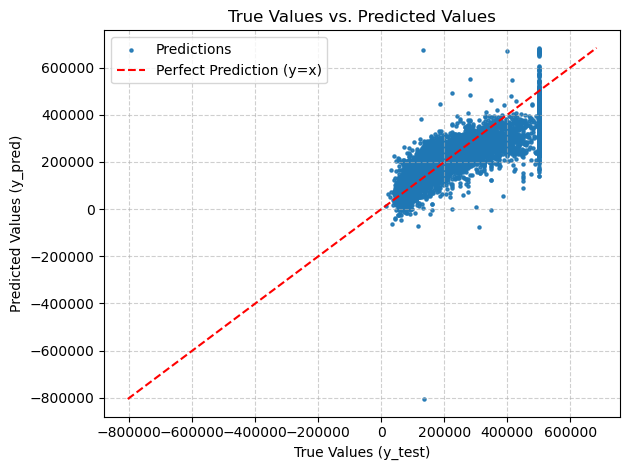

In [42]:
# plots
import matplotlib.pyplot as plt

y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

plt.scatter(y_test_flat, y_pred_flat, alpha=0.9, s=5, label='Predictions')

min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True Values vs. Predicted Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout() 
plt.show()

In [43]:
mse = np.mean((y_pred_flat - y_test_flat)**2)
print(mse)

5746700030.93921
